In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic = pd.read_csv(r"C:\Users\noufi\Downloads\Titanic-Dataset.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.shape

(891, 12)

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#missing values
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
#Age is a numerical variable. So we can replace it with median
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)

C:\Users\noufi\AppData\Local\Temp\ipykernel_24520\1518436158.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].median(), inplace=True)


In [9]:
# Cabin has many null values so we can drop this
titanic.drop('Cabin',axis=1,inplace=True)

In [10]:
#Embarked is categorical.Only 2 missing values. 
titanic.fillna(titanic['Embarked'].mode()[0],inplace=True)

In [11]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [12]:
print(titanic.duplicated().sum())

0


In [13]:
#Drop the unnecessary variables
titanic = titanic.drop(['PassengerId','Name','Ticket'],axis=1)

In [14]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [16]:
titanic.shape

(891, 8)

In [17]:
titanic['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [18]:
titanic['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [19]:
titanic['Sex'] = titanic['Sex'].map({'male':0,'female':1})
titanic['Embarked']=titanic['Embarked'].map({'S':0,'C':1,'Q':2})
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


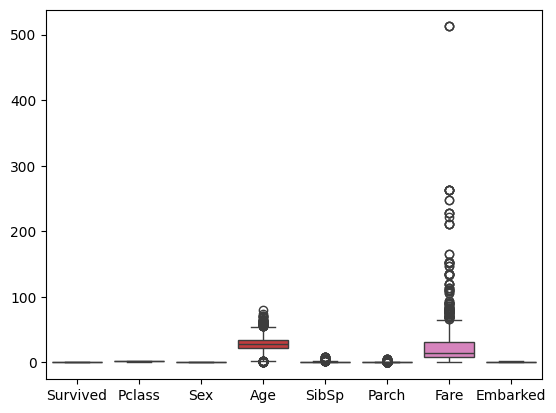

In [20]:
# Example: Boxplot of Age by Survival
sns.boxplot(data=titanic)
plt.show()

In [21]:
titanic['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [22]:
Q1 = titanic['Fare'].quantile(0.25)
Q3 = titanic['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = titanic[(titanic['Fare'] < lower_bound) | (titanic['Fare'] > upper_bound)]
outliers[['Fare']].shape[0]

116

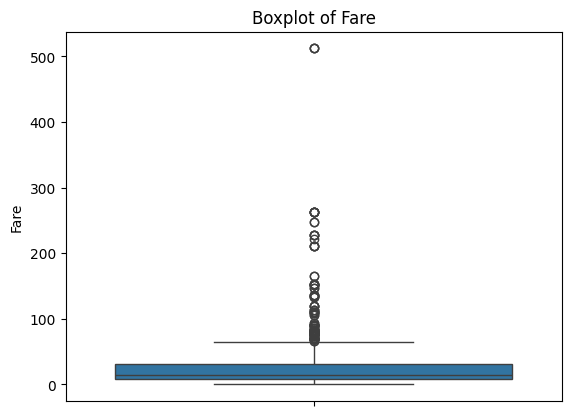

In [23]:
sns.boxplot(y='Fare', data=titanic)
plt.title('Boxplot of Fare')
plt.show()

In [24]:
Q1_age = titanic['Age'].quantile(0.25)
Q3_age = titanic['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
lower_bound_age = Q1_age - 1.5 * IQR_age
upper_bound_age = Q3_age + 1.5 * IQR_age
outliers = titanic[(titanic['Age'] < lower_bound_age) | (titanic['Age'] > upper_bound_age)]
outliers[['Age']].shape[0]

66

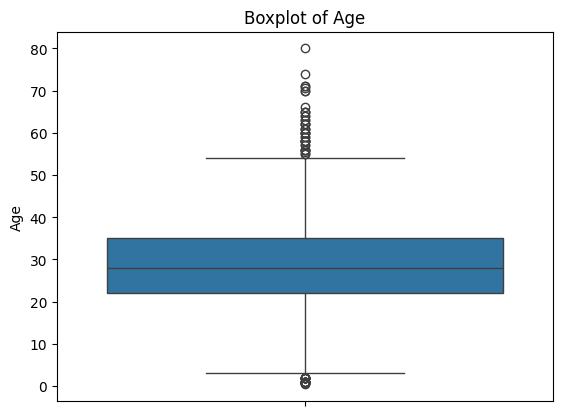

In [25]:
sns.boxplot(y='Age', data=titanic)
plt.title('Boxplot of Age')
plt.show()

In [26]:
Q1_s = titanic['SibSp'].quantile(0.25)
Q3_s = titanic['SibSp'].quantile(0.75)
IQR_s = Q3_s - Q1_s
lower_bound_s = Q1_s - 1.5 * IQR_s
upper_bound_s = Q3_s + 1.5 * IQR_s
outliers_s = titanic[(titanic['SibSp'] < lower_bound_s) | (titanic['SibSp'] > upper_bound_s)]
outliers_s[['SibSp']].shape[0]

46

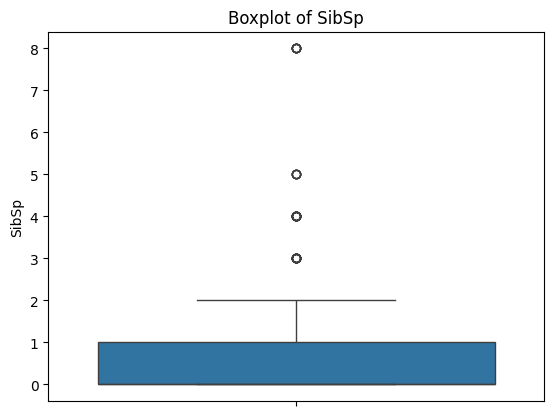

In [27]:
sns.boxplot(y='SibSp', data=titanic)
plt.title('Boxplot of SibSp')
plt.show()

In [28]:
Q1_p = titanic['Parch'].quantile(0.25)
Q3_p = titanic['Parch'].quantile(0.75)
IQR_p = Q3_p - Q1_p
lower_bound_p = Q1_p - 1.5 * IQR_p
upper_bound_p = Q3_p + 1.5 * IQR_p
outliers_p = titanic[(titanic['Parch'] < lower_bound_p) | (titanic['Parch'] > upper_bound_p)]
outliers_p[['Parch']].shape[0]

213

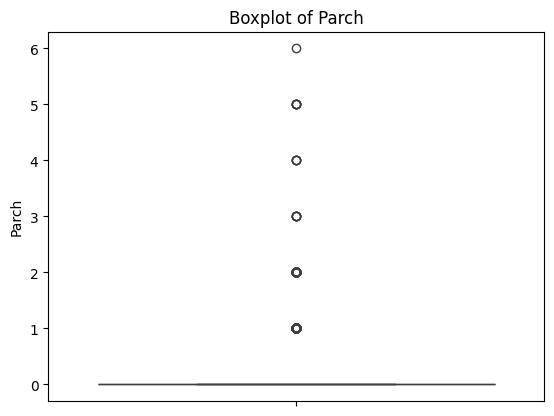

In [29]:
sns.boxplot(y='Parch', data=titanic)
plt.title('Boxplot of Parch')
plt.show()

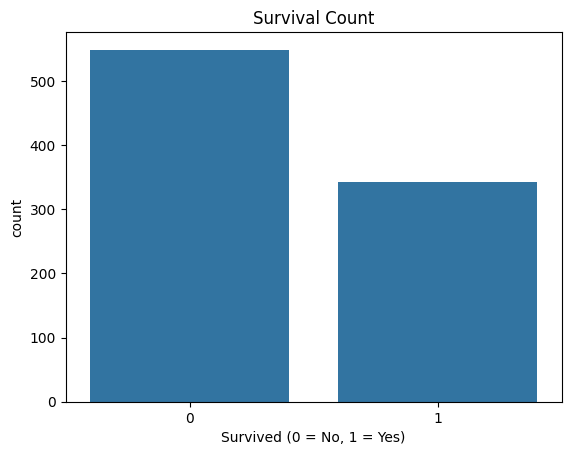

In [30]:
sns.countplot(x='Survived',data = titanic)
plt.title("Survival Count")
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.show()

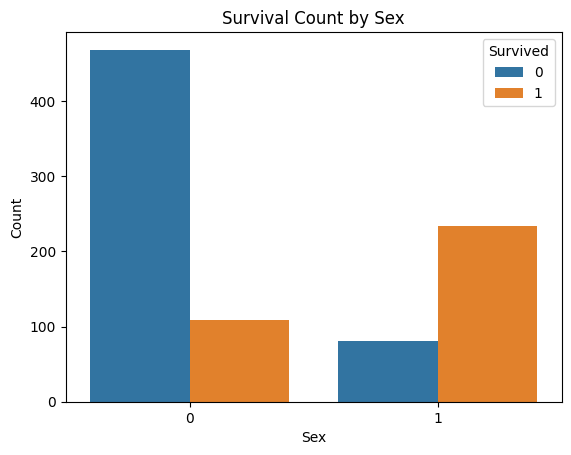

In [31]:
sns.countplot(x='Sex', hue='Survived', data=titanic)
plt.title('Survival Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived')
plt.show()


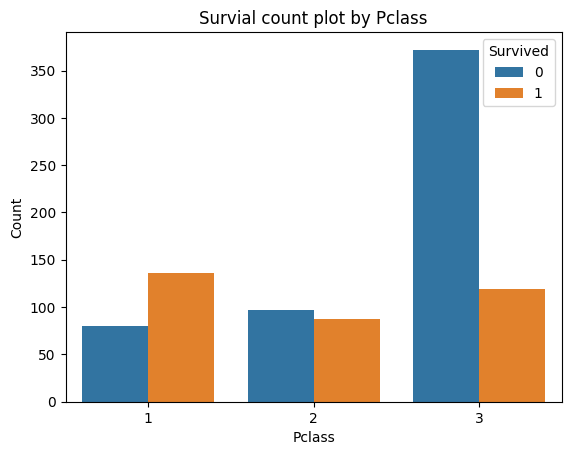

In [32]:
sns.countplot(x='Pclass', hue='Survived', data=titanic)
plt.title('Survial count plot by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.legend(title='Survived')
plt.show()

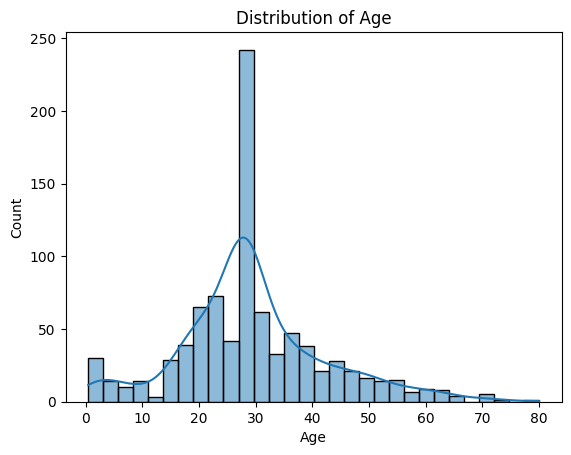

In [33]:
sns.histplot(titanic['Age'], kde=True)
plt.title('Distribution of Age')
plt.show()


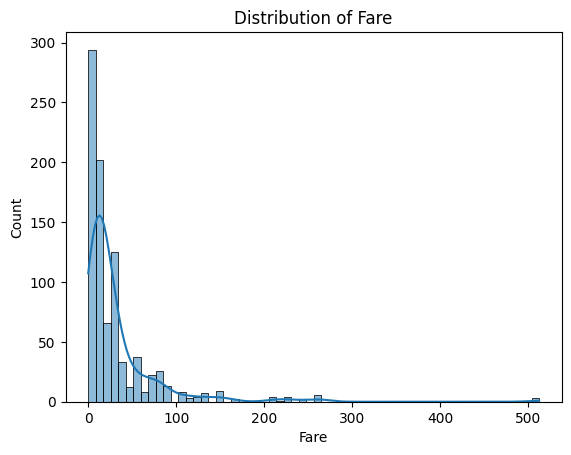

In [34]:
sns.histplot(titanic['Fare'], kde=True)
plt.title('Distribution of Fare')
plt.show()

In [35]:
corr = titanic.corr()
corr

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,0.543351,-0.064910,-0.035322,0.081629,0.257307,0.106811
Pclass,-0.338481,1.000000,-0.131900,-0.339898,0.083081,0.018443,-0.549500,0.045702
Sex,0.543351,-0.131900,1.000000,-0.081163,0.114631,0.245489,0.182333,0.116569
Age,-0.064910,-0.339898,-0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.009165
SibSp,-0.035322,0.083081,0.114631,-0.233296,1.000000,0.414838,0.159651,-0.059961
Parch,0.081629,0.018443,0.245489,-0.172482,0.414838,1.000000,0.216225,-0.078665
Fare,0.257307,-0.549500,0.182333,0.096688,0.159651,0.216225,1.000000,0.062142
Embarked,0.106811,0.045702,0.116569,-0.009165,-0.059961,-0.078665,0.062142,1.000000


<Axes: >

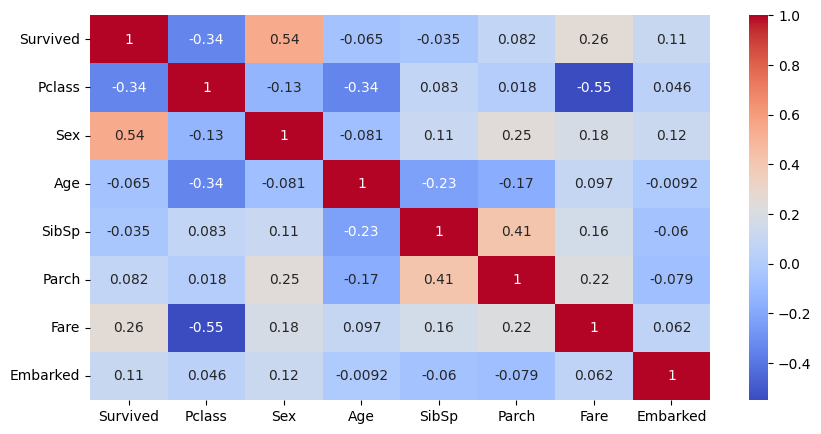

In [36]:
plt.figure(figsize=(10,5))
sns.heatmap(corr,annot=True,cmap='coolwarm')